In [77]:
# Supervised learning using a feedforward network

In [94]:
# Get and preprocess the data according to our requirement
import pandas as pd
import numpy as np
data = pd.read_csv('insurance.csv')
print('\n #Features = '+str(data.shape[1]))
print('\n #Samples = '+str(data.shape[0]))
indx = data.index[data['Number_of_claims'] == 0].tolist()
data.drop(indx).reset_index(drop=True)


 #Features = 2

 #Samples = 63


,Number_of_claims,Payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
57,9,87.4
58,31,209.8
59,14,95.5
60,53,244.6


In [95]:
# Following is the code for the training network.
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

torch.manual_seed(23)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
from torch.nn.functional import normalize

dat = data.to_numpy(dtype= np.float32) # dataframe  to numpy 
# Split data into input and labels
x = torch.from_numpy(dat[:,[0]])
x = torch.nn.functional.normalize(x, p=2.0, dim = 0)
y = torch.from_numpy(dat[:,[1]])

# Split data into test and train
train_size = int(0.8*len(dat))
test_size = len(dat)- train_size
x_train, x_test = torch.utils.data.random_split(x, [train_size, test_size])
y_train, y_test = torch.utils.data.random_split(y, [train_size, test_size])

# define train and test Datasets
class CustomDataset_train(Dataset):
    def __init__(self):
        self.x_train = x_train
        self.y_train = y_train
        self.num_samples = len(x_train)
        
    def __getitem__(self, index):
        return self.x_train[index], self.y_train[index]

    def __len__(self):
        return self.num_samples

class CustomDataset_test(Dataset):

    def __init__(self):
        self.x_test = x_test
        self.y_test = y_test
        self.num_samples = len(x_test)

    def __getitem__(self, index):
        return self.x_test[index], self.y_test[index]

    def __len__(self):
        return self.num_samples

data_train = CustomDataset_train()
data_test = CustomDataset_test()

batch_size= 1 #set batch size

train_dataloader = DataLoader(dataset = data_train, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset = data_test, batch_size=batch_size, shuffle=True)

In [96]:
import torch.nn as nn
input_size = x.shape[1]
output_size = y.shape[1]

# define network architecture
class myModel(nn.Module):
    def __init__(self,input_dim, output_dim, hidden_size1 =128, hidden_size2 = 128):
        super(myModel, self).__init__()
        #define network layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, output_size)
      
    def forward(self,x):
        
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        
        out = self.fc3(out)
        return out
    
model = myModel(input_size, output_size)
print(model)

myModel(
  (fc1): Linear(in_features=1, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=1, bias=True)
)


In [97]:
#define loss function, optimizer and hyperparameters
loss_fn = torch.nn.MSELoss()
learning_rate = 0.0001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
total_step = len(train_dataloader)

Epoch 1
-------------------------------
overall_train_loss: 578157.4938972294
overall_Test_loss: 497389.502045 

Epoch 2
-------------------------------
overall_train_loss: 573816.5605957508
overall_Test_loss: 495449.749741 

Epoch 3
-------------------------------
overall_train_loss: 568904.4708471298
overall_Test_loss: 493223.868774 

Epoch 4
-------------------------------
overall_train_loss: 563359.6154277325
overall_Test_loss: 490469.767403 

Epoch 5
-------------------------------
overall_train_loss: 556669.979414463
overall_Test_loss: 487566.074448 

Epoch 6
-------------------------------
overall_train_loss: 549203.3427761495
overall_Test_loss: 483894.458115 

Epoch 7
-------------------------------
overall_train_loss: 540310.9234151542
overall_Test_loss: 479875.219219 

Epoch 8
-------------------------------
overall_train_loss: 530552.5084577501
overall_Test_loss: 475138.053507 

Epoch 9
-------------------------------
overall_train_loss: 519643.1939769387
overall_Test_loss: 

overall_train_loss: 204108.07808327675
overall_Test_loss: 277656.566315 

Epoch 74
-------------------------------
overall_train_loss: 204204.99337792397
overall_Test_loss: 277826.785038 

Epoch 75
-------------------------------
overall_train_loss: 204431.06451249123
overall_Test_loss: 277779.650936 

Epoch 76
-------------------------------
overall_train_loss: 204151.29968500137
overall_Test_loss: 277471.751390 

Epoch 77
-------------------------------
overall_train_loss: 204282.6989045143
overall_Test_loss: 277604.925447 

Epoch 78
-------------------------------
overall_train_loss: 204149.73036766052
overall_Test_loss: 277913.421257 

Epoch 79
-------------------------------
overall_train_loss: 204098.06415104866
overall_Test_loss: 277520.211874 

Epoch 80
-------------------------------
overall_train_loss: 204654.11032950878
overall_Test_loss: 276951.468267 

Epoch 81
-------------------------------
overall_train_loss: 204316.13097953796
overall_Test_loss: 277773.277857 

Epoch 8

overall_train_loss: 203888.88887169957
overall_Test_loss: 277308.106419 

Epoch 148
-------------------------------
overall_train_loss: 203882.85822818056
overall_Test_loss: 276909.737078 

Epoch 149
-------------------------------
overall_train_loss: 203946.08521813154
overall_Test_loss: 277310.699268 

Epoch 150
-------------------------------
overall_train_loss: 203762.8485864997
overall_Test_loss: 276984.237799 

Epoch 151
-------------------------------
overall_train_loss: 204071.49230638146
overall_Test_loss: 277026.710140 

Epoch 152
-------------------------------
overall_train_loss: 203844.75595141947
overall_Test_loss: 276844.730230 

Epoch 153
-------------------------------
overall_train_loss: 203936.76785098016
overall_Test_loss: 277134.250092 

Epoch 154
-------------------------------
overall_train_loss: 203768.90557417274
overall_Test_loss: 277112.054338 

Epoch 155
-------------------------------
overall_train_loss: 204085.18791867048
overall_Test_loss: 276889.790344 


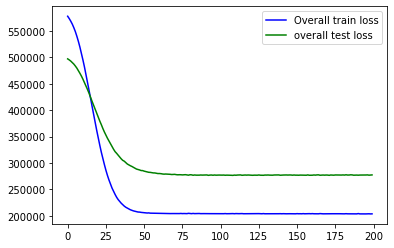

In [98]:
def train(dataloader, model, loss_fn, optimizer, batch_size, overall_train_loss):
    model.train()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        overall_train_loss += loss.item()
        
        #if batch % 2 == 0:
        #   loss, current = loss.item(), (batch+1) * batch_size
        #    print(f"Train_loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    print('overall_train_loss: '+str(overall_train_loss))
    return overall_train_loss

def test(dataloader, model, loss_fn, overall_test_loss):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
    #test_loss /= num_batches
    print(f"overall_Test_loss: {test_loss:>8f} \n")
    return test_loss

epochs = 200
otrl = []
otel = []
for t in range(epochs):
    overall_train_loss = 0
    overall_test_loss = 0
    print(f"Epoch {t+1}\n-------------------------------")
    otrl.append(train(train_dataloader, model, loss_fn, optimizer, batch_size, overall_train_loss))
    otel.append(test(test_dataloader, model, loss_fn, overall_test_loss))
    
xc = np.arange(len(otrl))
plt.plot(xc, otrl, '-b', label = 'Overall train loss')
plt.plot(xc, otel, '-g', label = 'overall test loss')
plt.legend()
plt.show()